<a href="https://colab.research.google.com/github/aartimodi02/ParabolAH-/blob/main/Penguins_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penguin Project**











By Aarti Modi and Akshyae Singh

## **Group Contributions Statement:**





In [ ]:
import warnings
warnings.filterwarnings("ignore")

two of us wrote the data acquisition, preparation and exploratory analysis. Akshyae led Figure 2, Table 1-2, and the linear regression model. Aarti led Figure 1, the Random Forest model and the K-nearest neighbor models. We both collectively worked on the problems we faced along the way. We both wrote the explanation of our own figures and the explanation of our own models, and the conclusion. We both checked each other’s work and made revisions to code and writing.

## **Data import and cleaning:**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier



In [ ]:
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

# shorten the species name
penguins["Species"] = penguins["Species"].str.split().str.get(0)


In [ ]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo,Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


In [ ]:
#inspecting the qualitative data
print(set(penguins["Sex"]))
print(set(penguins["Species"]))
print(set(penguins["Island"]))

{nan, 'MALE', '.', 'FEMALE'}
{'Chinstrap', 'Adelie', 'Gentoo'}
{'Torgersen', 'Dream', 'Biscoe'}


From this we can see that we need to remove nan values and the line with the value '.' for sex. However, we will do this after splitting our data to avoid error

In [ ]:
penguins = penguins.drop(['Stage', 'Comments', 'Individual ID', 'Clutch Completion', 'studyName', 'Date Egg', 'Region', 'Sample Number'], axis = 1)
penguins

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969


In [ ]:
np.random.seed(10000000)

In [ ]:
train, test = train_test_split(penguins, test_size = 0.2)

In [ ]:
train

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
160,Chinstrap,Dream,46.0,18.9,195.0,4150.0,FEMALE,8.47173,-24.29229
34,Adelie,Dream,36.4,17.0,195.0,3325.0,FEMALE,9.17847,-25.23061
128,Adelie,Torgersen,39.0,17.1,191.0,3050.0,FEMALE,9.19031,-25.73722
107,Adelie,Biscoe,38.2,20.0,190.0,3900.0,MALE,9.59245,-25.70711
187,Chinstrap,Dream,47.5,16.8,199.0,3900.0,FEMALE,9.07825,-25.14550
...,...,...,...,...,...,...,...,...,...
316,Gentoo,Biscoe,49.4,15.8,216.0,4925.0,MALE,8.03624,-26.06594
218,Chinstrap,Dream,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741
196,Chinstrap,Dream,50.9,17.9,196.0,3675.0,FEMALE,9.43684,-24.16566
100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,FEMALE,8.84451,-26.28055


In [ ]:
test

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
270,Gentoo,Biscoe,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352
55,Adelie,Biscoe,41.4,18.6,191.0,3700.0,MALE,8.35396,-26.27853
309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,MALE,8.27595,-26.11657
282,Gentoo,Biscoe,45.7,13.9,214.0,4400.0,FEMALE,8.62870,-26.60484
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,MALE,9.31735,-25.45171
...,...,...,...,...,...,...,...,...,...
279,Gentoo,Biscoe,50.4,15.3,224.0,5550.0,MALE,8.74647,-26.79846
192,Chinstrap,Dream,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
326,Gentoo,Biscoe,41.7,14.7,210.0,4700.0,FEMALE,8.12311,-26.44815


In [ ]:
def prep_penguin_data(data_df):
    df = data_df.copy()
    df = df.dropna()
    df = df[df['Sex']!='.']
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Island'] = le.fit_transform(df['Island'])
    df['Species'] = le.fit_transform(df['Species'])

    X = df.drop(['Species'], axis = 1)
    y = df['Species']

    return(X, y)

In [ ]:
X_train, Y_train = prep_penguin_data(train)
X_test, Y_test = prep_penguin_data(test)

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((258, 8), (258,), (66, 8), (66,))

In [ ]:
print(X_train)
print(Y_train)

     Island  Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
160       1                46.0               18.9                195.0   
34        1                36.4               17.0                195.0   
128       2                39.0               17.1                191.0   
107       0                38.2               20.0                190.0   
187       1                47.5               16.8                199.0   
..      ...                 ...                ...                  ...   
316       0                49.4               15.8                216.0   
218       1                50.8               19.0                210.0   
196       1                50.9               17.9                196.0   
100       0                35.0               17.9                192.0   
67        0                41.1               19.1                188.0   

     Body Mass (g)  Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
160         4150.0    0            

## **Exploratory Analysis:**

In [ ]:
penguins = penguins.dropna()
penguins = penguins.loc[penguins["Sex"] != "."]


### Data Tables - Identifying Culmen Length, Flipper Length and Body Mass

In [ ]:
#Creating a data table to understand the mean difference between the species with regards to the quantitative data

penguins.groupby('Species').mean()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Species,,,,,,
Adelie,38.785612,18.323022,190.323741,3702.697842,8.859398,-25.813557
Chinstrap,48.788060,18.404478,195.671642,3729.850746,9.356155,-24.557869
Gentoo,47.570339,14.994068,217.194915,5091.101695,8.249349,-26.183681


From the data table above, it can be seen that the highest variation of mean value across the species is **Culmen Length, Flipper Length, and Body Mass**. The other features have values where either all 3 are very close to each other, or two features overlap.

In [ ]:
#creating a data table to find corelation between the quantitative features

penguins.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.222923,0.648947,0.591724,-0.056942,0.188517
Culmen Depth (mm),-0.222923,1.000000,-0.574924,-0.470177,0.599481,0.420012
Flipper Length (mm),0.648947,-0.574924,1.000000,0.877066,-0.501601,-0.375570
Body Mass (g),0.591724,-0.470177,0.877066,1.000000,-0.539795,-0.372041
Delta 15 N (o/oo),-0.056942,0.599481,-0.501601,-0.539795,1.000000,0.569393
Delta 13 C (o/oo),0.188517,0.420012,-0.375570,-0.372041,0.569393,1.000000


Since Flipper Length and Body Mass have the highest corelation, we can select either **Flipper Length OR Body Mass** along with Culmen Length for similar results. We will use seaborn to further visualise them and chose the best feature.

In [ ]:
#Creating a data table, grouped by the qualitative features

penguins.groupby(["Species","Sex", "Island"]).agg([len,np.mean])

Culmen Length (mm)            Culmen Depth (mm)  \
                                          len       mean               len   
Species   Sex    Island                                                      
Adelie    FEMALE Biscoe                    22  37.359091                22   
                 Dream                     27  36.911111                27   
                 Torgersen                 22  37.436364                22   
          MALE   Biscoe                    22  40.590909                22   
                 Dream                     25  40.012000                25   
                 Torgersen                 21  40.752381                21   
Chinstrap FEMALE Dream                     34  46.573529                34   
          MALE   Dream                     33  51.069697                33   
Gentoo    FEMALE Biscoe                    58  45.563793                58   
          MALE   Biscoe                    60  49.510000                60   

                                      Flipper Length (mm)              \
                                 mean                 len        mean   
Species   Sex    Island                                                 
Adelie    FEMALE Biscoe     17.704545                  22  187.181818   
                 Dream      17.618519                  27  187.851852   
                 Torgersen  17.536364                  22  188.727273   
          MALE   Biscoe     19.036364                  22  190.409091   
                 Dream      18.840000                  25  192.520000   
                 Torgersen  19.338095                  21  195.761905   
Chinstrap FEMALE Dream      17.588235                  34  191.735294   
          MALE   Dream      19.245455                  33  199.727273   
Gentoo    FEMALE Biscoe     14.237931                  58  212.706897   
          MALE   Biscoe     15.725000                  60  221.533333   

                           Body Mass (g)              Delta 15 N (o/oo)  \
                                     len         mean               len   
Species   Sex    Island                                                   
Adelie    FEMALE Biscoe               22  3369.318182                22   
                 Dream                27  3344.444444                27   
                 Torgersen            22  3390.909091                22   
          MALE   Biscoe               22  4050.000000                22   
                 Dream                25  4052.000000                25   
                 Torgersen            21  4059.523810                21   
Chinstrap FEMALE Dream                34  3527.205882                34   
          MALE   Dream                33  3938.636364                33   
Gentoo    FEMALE Biscoe               58  4679.741379                58   
          MALE   Biscoe               60  5488.750000                60   

                                     Delta 13 C (o/oo)             
                                mean               len       mean  
Species   Sex    Island                                            
Adelie    FEMALE Biscoe     8.774242                22 -25.920176  
                 Dream      8.914803                27 -25.736636  
                 Torgersen  8.663160                22 -25.738735  
          MALE   Biscoe     8.872945                22 -25.917227  
                 Dream      8.984427                25 -25.759120  
                 Torgersen  8.919919                21 -25.835347  
Chinstrap FEMALE Dream      9.250962                34 -24.565405  
          MALE   Dream      9.464535                33 -24.550104  
Gentoo    FEMALE Biscoe     8.193405                58 -26.197205  
          MALE   Biscoe     8.303429                60 -26.170608

In [ ]:
penguins.groupby(["Species","Island", "Sex"]).agg([len,np.mean])

Culmen Length (mm)            Culmen Depth (mm)  \
                                          len       mean               len   
Species   Island    Sex                                                      
Adelie    Biscoe    FEMALE                 22  37.359091                22   
                    MALE                   22  40.590909                22   
          Dream     FEMALE                 27  36.911111                27   
                    MALE                   25  40.012000                25   
          Torgersen FEMALE                 22  37.436364                22   
                    MALE                   21  40.752381                21   
Chinstrap Dream     FEMALE                 34  46.573529                34   
                    MALE                   33  51.069697                33   
Gentoo    Biscoe    FEMALE                 58  45.563793                58   
                    MALE                   60  49.510000                60   

                                      Flipper Length (mm)              \
                                 mean                 len        mean   
Species   Island    Sex                                                 
Adelie    Biscoe    FEMALE  17.704545                  22  187.181818   
                    MALE    19.036364                  22  190.409091   
          Dream     FEMALE  17.618519                  27  187.851852   
                    MALE    18.840000                  25  192.520000   
          Torgersen FEMALE  17.536364                  22  188.727273   
                    MALE    19.338095                  21  195.761905   
Chinstrap Dream     FEMALE  17.588235                  34  191.735294   
                    MALE    19.245455                  33  199.727273   
Gentoo    Biscoe    FEMALE  14.237931                  58  212.706897   
                    MALE    15.725000                  60  221.533333   

                           Body Mass (g)              Delta 15 N (o/oo)  \
                                     len         mean               len   
Species   Island    Sex                                                   
Adelie    Biscoe    FEMALE            22  3369.318182                22   
                    MALE              22  4050.000000                22   
          Dream     FEMALE            27  3344.444444                27   
                    MALE              25  4052.000000                25   
          Torgersen FEMALE            22  3390.909091                22   
                    MALE              21  4059.523810                21   
Chinstrap Dream     FEMALE            34  3527.205882                34   
                    MALE              33  3938.636364                33   
Gentoo    Biscoe    FEMALE            58  4679.741379                58   
                    MALE              60  5488.750000                60   

                                     Delta 13 C (o/oo)             
                                mean               len       mean  
Species   Island    Sex                                            
Adelie    Biscoe    FEMALE  8.774242                22 -25.920176  
                    MALE    8.872945                22 -25.917227  
          Dream     FEMALE  8.914803                27 -25.736636  
                    MALE    8.984427                25 -25.759120  
          Torgersen FEMALE  8.663160                22 -25.738735  
                    MALE    8.919919                21 -25.835347  
Chinstrap Dream     FEMALE  9.250962                34 -24.565405  
                    MALE    9.464535                33 -24.550104  
Gentoo    Biscoe    FEMALE  8.193405                58 -26.197205  
                    MALE    8.303429                60 -26.170608

From the data tables, it can be seen that Culmen length differentiates between the penguins whether we group by island and then sex or vice versa. Moreover, as said before, Flipper Lenght and Body Mass also have differing mean values and positive corelation

Therefore, we need to select two features from:
#### **Culmen length** and **Flipper Length OR Body Mass**

### Hist Plot - Flipper Length vs Body Mass



Since we had to first chose between Flipper Length and Body Mass, we will plot a histogram of each segregated by the species to visualise the data

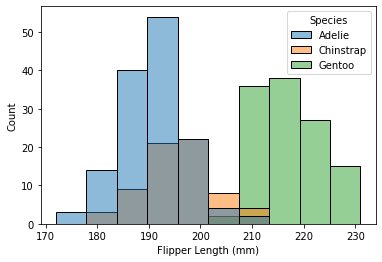

In [ ]:
fgrid = sns.histplot(data = penguins,
                    x =  'Flipper Length (mm)',
                    hue = 'Species')


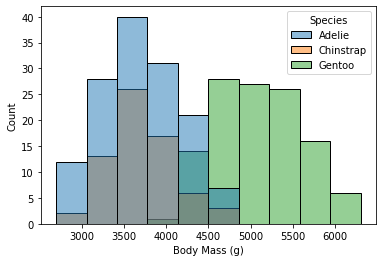

In [ ]:
fgrid = sns.histplot(data = penguins,
                    x = 'Body Mass (g)',
                    hue = 'Species')

Since both graphs show a similar trend, it highlights the positive corelation between Flipper Length and Body mass, and shows that the species are varied across it. Therefore, choosing one of these features would be beneficial.

When chosing body mass, Chinstraps are entirely overlapped with either of the other two species. Therefore, it is beneficial to select **Flipper Lenght (mm)**

Moreover, selecting either of these features would have allowed identification of Gentoo since there is minimal overlap with Adelie or Chinstrap. Therefore, after having selected one of these quantitative features, it is now important to find something that specifically differentiates Adelia and Chinstrap from each other

Therefore, from the data tables and scatter plot, the quantitative features that we have chosen are:
#### **Culmen Length (mm) and Flipper Length (mm)**

### Bar Plot - Island versus Sex


<function matplotlib.pyplot.show(close=None, block=None)>

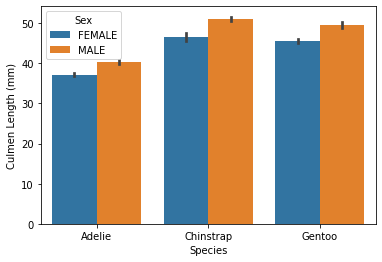

In [ ]:
fgrid = sns.barplot(data= penguins,
                    x= "Species",
                    y= "Culmen Length (mm)",
                    hue= "Sex")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

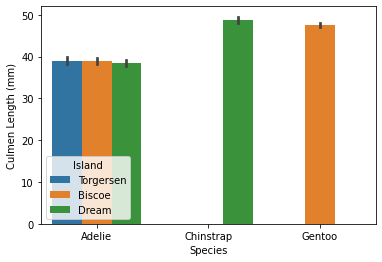

In [ ]:
fgrid = sns.barplot(data= penguins,
                    x= "Species",
                    y= "Culmen Length (mm)",
                    hue= "Island")

plt.show

The two graphs suggest that for Culmen Length, the species vary according to their sex, more than by island, as Adelie penguins have the same values regardless of the Island. Moreover, Since there isnt an equal distrubution of penguins across the islands, it would be an unfair feature to train with. Therefore, we select Sex as the qualitative variable

Therefore, from the bar plots, the qualitative feature that we have chosen is:
####**Sex**

### Scatter Plot - Visualising the selected features

Now that we have our three features: Culmen Length, Flipper Lenght and Sex, we can visualise it as a scatter plot to see how varied the features are

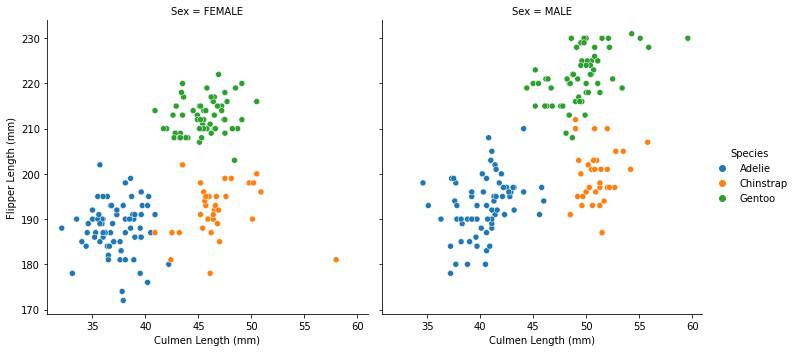

In [ ]:
sns.relplot(data = penguins,
            x = 'Culmen Length (mm)',
            y = 'Flipper Length (mm)',
            hue = 'Species',
            col = 'Sex')
plt.show()


As seen from the scatter plot above, the species have been seperated into different clusters, allowing identification of the species based on these features.


Therefore, our final features from our exploratory analysis are:
#### **Culmen Length, Flipper Length, and Sex**


## **Feature Selection:**

Uses automated features selection to find the combination of features that are highly predictive of a penguin's species

In [ ]:
def check_column_score(cols):
    """
    Trains and evaluates a model via cross-validation on the columns of the data
    with selected indices
    """
    print("training with columns " + str(cols))

    LR = LogisticRegression(max_iter=6000)
    return cross_val_score(LR, X_train[cols], Y_train, cv = 5).mean()

In [ ]:
combos = [['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Sex', 'Culmen Length (mm)', 'Body Mass (g)'],
          ['Sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Flipper Length (mm)', 'Body Mass (g)'],
          ['Sex', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Body Mass (g)', 'Delta 13 C (o/oo)'],
          ['Sex', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
          ['Sex', 'Delta 13 C (o/oo)', 'Delta 15 N (o/oo)'],

          ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Island', 'Culmen Length (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
          ['Island', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'],
          ['Island', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Culmen Depth (mm)', 'Body Mass (g)'],
          ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Island', 'Flipper Length (mm)', 'Body Mass (g)'],
          ['Island', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
          ['Island', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
          ['Island', 'Body Mass (g)', 'Delta 13 C (o/oo)'],
          ['Island', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
          ['Island', 'Delta 13 C (o/oo)', 'Delta 15 N (o/oo)']]

for cols in combos:
    x = check_column_score(cols)
    print("CV score is " + str(np.round(x, 3)))

training with columns ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.957
training with columns ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.981
training with columns ['Sex', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.969
training with columns ['Sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)']
CV score is 0.95
training with columns ['Sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
CV score is 0.965
training with columns ['Sex', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']
CV score is 0.946
training with columns ['Sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']
CV score is 0.834
training with columns ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is 0.767
training with columns ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.806
training with columns ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.721
training with columns ['Sex', 'Flipper Length (mm)', 'Delta 15 N (o/oo)']
CV score is 0.865
training w

As seen from the CV scores above, the features that were chosen were not the ones that provided the ideal result although they did have a relatively high CV value as well.

Moreover, there was also human error in selecting the second quantitative feature since Body mass instead of flipper length returns a higher CV score. However, the difference is with of 0.02 and thus difficult to understand simply by visualising. Therefore, this highlights the importance of the cross value score to finalise the most important features when sorting through data to make predictions.

In conlusion from the automated feature selection, the best features which resulted in the  highest Cross Valuation score was:

#### **Sex, Culmen Length (mm) and Culmen Depth (mm)**

## **Modeling:**

Now that we have the features that return the highest score, we can create models to predict the species of the penguin.

To do so, we first create the model, and predict the y values using the same on our test data.

We then create a confusion matrix to be able to visualise the accuracy of each model, as it highlights where each penguin was classified and how accurately.

Lastly, we then create decision regions to evaluate the model's performance on the data set.


##### **Decision Regions Function**

In [ ]:
def plot_region(T,x,y):

    '''

      function returns a specific region within the input space which corresponds to a unique output class based on the Machine learning model used
    Args:
        T: Initiated Machine leaning model
        x: numpy array of X_test dataset containing all columns excluding [species] variable
        y: numpy array of species in the dataframe
    Returns:
        plot of specific regions within the input space which corresponds to a unique output class based on the Machine learning model used


    '''

    T.fit(x,y)

    for i in range(2):

        xtemp = x[x["Sex"]==i]
        ytemp = y[x["Sex"]==i]


        x0=xtemp["Culmen Length (mm)"]
        x1=xtemp["Culmen Depth (mm)"]

        grid_x=np.linspace(x0.min(),x0.max(),501)
        grid_y=np.linspace(x1.min(),x1.max(),501)

        xx,yy=np.meshgrid(grid_x,grid_y)

        zz=np.ones(xx.shape)*i
        ZZ=zz.ravel()
        XX=xx.ravel()
        YY=yy.ravel()

        p=T.predict(np.c_[XX,YY,ZZ]) # c stands for concatenation
        p=p.reshape(xx.shape)

        fig,ax=plt.subplots(1)
        ax.scatter(x0,x1,c=ytemp,cmap="jet",alpha=1)

        #this makes our decision regions
        ax.contourf(xx,yy,p,cmap="jet",alpha=0.2)

        ax.set(xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)",title=f"{i}")

##### **Data set with highest cross validation score**

In [ ]:
cols=["Culmen Length (mm)","Culmen Depth (mm)","Sex"]
x_train = X_train[cols]
x_test = X_test[cols]

### Linear Regression

#### Creating the model

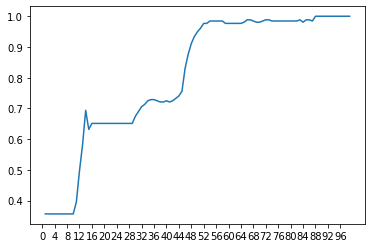

In [ ]:
#Used the graph above to find the optimal level of iterations to prevent overfitting to the best of our abilities

import matplotlib.pyplot as plt

iter1 = []
LR_Scoreeee = []

for iter in range(1,100):
  LR = LogisticRegression(multi_class = "multinomial", solver = "lbfgs",max_iter=iter)
  LR.fit(X_train, Y_train)
  LR_Scoreeee.append(LR.score(X_train, Y_train))
  iter1.append(iter)

plt.xticks(np.arange(0, 100, 4))
plt.plot(iter1, LR_Scoreeee)

From the graph above, the ideal iteration limit is between 52 to 60 since there is a chance of overfitting beyond this value

In [ ]:
LR = LogisticRegression(multi_class = "multinomial", solver = "lbfgs",max_iter=56)
LR.fit(x_train, Y_train)
LR.score(x_train, Y_train)


0.9922480620155039

####Predicting the Y values with the model

In [ ]:
# Evaluate the model
y_predLR = LR.predict(x_test)
LR_testscore = LR.score(x_test, y_predLR)

print (LR_testscore)


1.0


####Confusion Matrix

[[32  0  0]
 [ 0  8  0]
 [ 0  0 26]]


<function matplotlib.pyplot.show(close=None, block=None)>

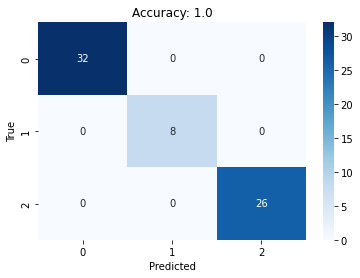

In [ ]:
# Create a confusion matrix for the model
confusion_matLR = confusion_matrix(Y_test, y_predLR)
print (confusion_matLR)

cm1 = sns.heatmap(confusion_matLR, annot=True, cmap='Blues', fmt='g')
cm1.set(xlabel = "Predicted", ylabel = 'True')
plt.title(f'Accuracy: {LR_testscore}')
plt.show

The confusion matrix shows that all the penguins were correctly classified into their species using a Logistic Regression Model of machine learning.


#### Decision Region

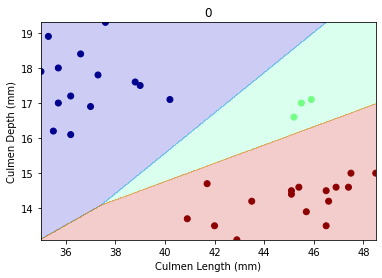

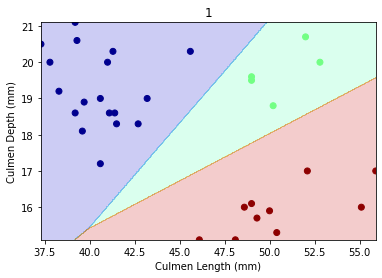

In [ ]:
plot_region(LR,x_test,Y_test)

The decision regions too show that each penguin was correctly assigned its spcies when fit to this LR model.

A problem with Linear Regression model is that it  assumes that the connection between the input variables and the output variable is linear, which means that the decision areas for a linear regression model will always be linear.

linear regression models can be affected by outliers in the data, which can have an impact on the model's decision areas and result in poor performance.

### Random Forest Classifier

#### Creating the model

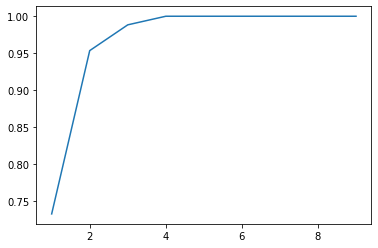

In [ ]:
depth1 = []
RFC_S = []

for depth in range(1,10):
  RFC = RandomForestClassifier(max_depth=depth)
  RFC.fit(x_train, Y_train)
  RFC_S.append(RFC.score(x_train, Y_train))
  depth1.append(depth)

plt.xticks(np.arange(0, 50, 2))
plt.plot(depth1, RFC_S)

highest value for max_depth before the model starts overfitting is seen to be around 3 from the graph above

In [ ]:
# Create the model

RFC = RandomForestClassifier(n_estimators=50, max_depth=3)
RFC.fit(x_train, Y_train)
RFC.score(x_train, Y_train)

0.9806201550387597

#### Predicting Y values with the model

In [ ]:
# Evaluate the model
y_predRFC = RFC.predict(x_test)
RFC_testscore = RFC.score(x_test, Y_test)

print (RFC_testscore)


0.9848484848484849


#### Confusion Matrix

[[31  1  0]
 [ 0  8  0]
 [ 0  0 26]]




<function matplotlib.pyplot.show(close=None, block=None)>

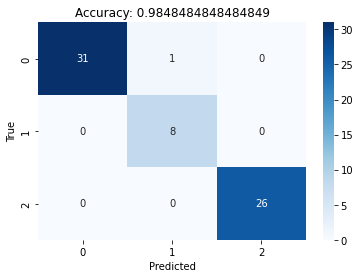

In [ ]:
# Create a confusion matrix for the model
confusion_matRFC = confusion_matrix(Y_test, y_predRFC)
print (confusion_matRFC)
print ('\n')

cm2 = sns.heatmap(confusion_matRFC, annot=True, cmap='Blues', fmt='g')
cm2.set(xlabel = 'Predicted', ylabel = 'True')
plt.title(f'Accuracy: {RFC_testscore}')
plt.show

There was error in classifying one penguin as Chinstrap was label to be Adelie

#### Decision Region

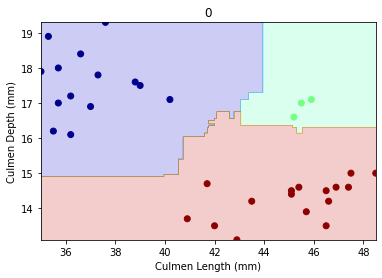

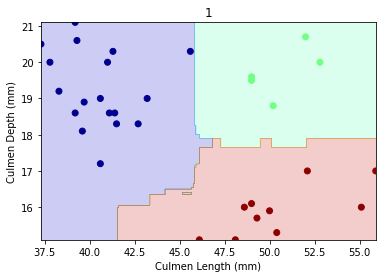

In [ ]:
plot_region(RFC,x_test,Y_test)

Random forest models are non-linear and can model complicated relationships between the input and output variables. However, they may overfit the training data, which can lead to poor performance on new, unseen data. This can result in decision regions that are too specific to the training data and do not generalize well to new data. Moreover, if the data is unbalanced, the model may give preference to the majority class and create decision regions that do not represent the minority class effectively.

### K-nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, Y_train)
knn.score(x_train, Y_train)

0.9844961240310077

In [ ]:
y_predKNN = knn.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, y_predKNN)
print("Accuracy:", accuracy)

Accuracy: 0.9848484848484849


[[32  0  0]
 [ 0  8  0]
 [ 0  1 25]]




<function matplotlib.pyplot.show(close=None, block=None)>

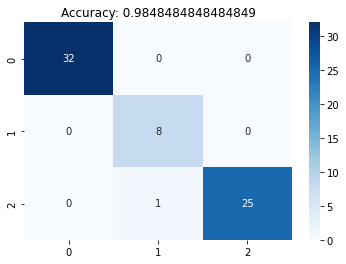

In [ ]:
# Create a confusion matrix for the model
confusion_matKNN = confusion_matrix(Y_test, y_predKNN)
print (confusion_matKNN)
print ('\n')

sns.heatmap(confusion_matKNN, annot=True, cmap='Blues', fmt='g')
plt.title(f'Accuracy: {RFC_testscore}')
plt.show

#### Decision Region

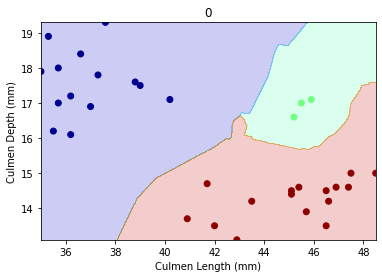

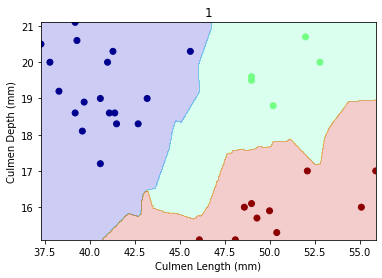

In [ ]:
plot_region(knn,x_test,Y_test)

 KNN models are sensitive to the choice of the number of nearest neighbors used to make predictions. If the wrong number of neighbors is used, the model may overfit or underfit the data and create decision regions that do not accurately represent the true decision boundaries.

## **Discussion**

The Linear Regression model is highly accurate with the accuracy score of the test data as 1.0. The Random Forest Classifier model and K-nearest neighbor are relatively less accurate than Linear Regression model. After modeling the data, we would recommend using Linear Regression model evaluating Culmen  Depth, Culmen Length, and Sex.

The availability of more data can improve the accuracy of the model because it provides more information to train the model. Additionally, a larger dataset makes it easier to identify outliers, leading to more apparent trends and distributions in the data. With more data, variance is increased while bias is decreased, which can lead to improved accuracy.
If different data is available, the model can be improved by using the new data to create new combinations. The effectiveness of these new combinations can be measured using the cross-validation score, and if the score is higher than the current score, accuracy is improved. However, it is crucial to ensure that the new data is relevant and adds value to the model's feature set.

Another way to enhance the Linear Regression model's performance is to explore other regression models, such as polynomial regression or ridge regression, which can capture more complex relationships between the input and output variables.